# Curva característica de una célula solar

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tabulate import tabulate
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data
DATA_PATH = "data/"

# Figures
FIGURES_PATH = "figures/"

   d (cm) |   Vth (V) (Amplificada) |   J (Wm^-2) (intensidad) |   d (m)
----------+-------------------------+--------------------------+---------
       63 |                   1.2   |                  528.867 |    0.63
       70 |                   0.998 |                  439.841 |    0.7
       80 |                   0.774 |                  341.119 |    0.8
       90 |                   0.62  |                  273.248 |    0.9
      100 |                   0.507 |                  223.446 |    1
      110 |                   0.423 |                  186.426 |    1.1
      120 |                   0.362 |                  159.542 |    1.2
      130 |                   0.31  |                  136.624 |    1.3
      140 |                   0.266 |                  117.232 |    1.4
      145 |                   0.25  |                  110.181 |    1.45
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:  

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


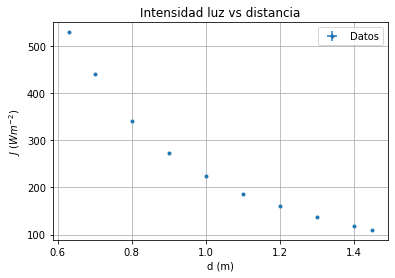

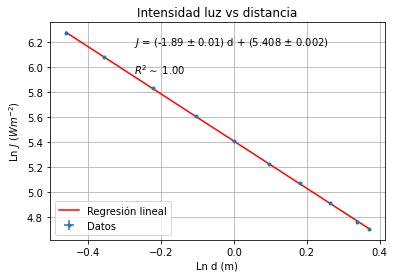

In [2]:
# Experimento 1

amplificacion = 100
sensibilidad_termopila = 22.69 * (10**(-6)) # V/Wm^{-2}

df_e1 = pd.read_csv(DATA_PATH + "experimento1_celula_solar.csv")
df_e1["J (Wm^-2) (intensidad)"] = (df_e1["Vth (V) (Amplificada)"] / 100) / sensibilidad_termopila
df_e1["d (m)"] = df_e1["d (cm)"] / 100

print(tabulate(
    df_e1, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y1 = df_e1["J (Wm^-2) (intensidad)"].to_numpy()
y = np.log(y1)
x1 = df_e1["d (m)"].to_numpy()
x = np.log(x1)
X = sm.add_constant(x, prepend=True) # Our model needs an intercept so we add a column of 1s

ols1 = sm.OLS(y, X)
ols_result1 = ols1.fit()
print(ols_result1.summary())
print(" ")

y_pred = ols_result1.predict(X)
print("Coeficiente: %.3f" % ols_result1.params[1])
print("Término independiente: %.3f" % ols_result1.params[0])
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("R2: %.2f" % ols_result1.rsquared)
print(" ")

errorV = 0.001 # V
errorD = 0.001 # m

errorJ = (errorV / 100) / sensibilidad_termopila

plt.errorbar(x1, y1, xerr=errorD, yerr=errorJ, fmt=".", label="Datos")
plt.title("Intensidad luz vs distancia")
plt.xlabel("d (m)")
plt.ylabel("$J$ ($Wm^{-2}$)")
plt.grid(True)
plt.legend()
plt.savefig(FIGURES_PATH + "experimento1.png")
plt.show()

errorD_log = errorD / x1
errorJ_log = errorJ / y1

plt.errorbar(x, y, xerr=errorD_log, yerr=errorJ_log, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title("Intensidad luz vs distancia")
plt.xlabel("Ln d (m)")
plt.ylabel("Ln $J$ ($Wm^{-2}$)")
plt.figtext(.32, .8, f"$J$ = (%.2f $\pm$ %.2f) d + (%.3f $\pm$ %.3f)" % (ols_result1.params[1], ols_result1.bse[1], ols_result1.params[0], ols_result1.bse[0]))
plt.figtext(.32, .7, f"$R^2 \sim$ %.2f" % ols_result1.rsquared)
plt.grid(True)
plt.legend(loc="lower left")
plt.savefig(FIGURES_PATH + "experimento1_reg.png")
plt.show()

In [3]:
#!pip install kneed

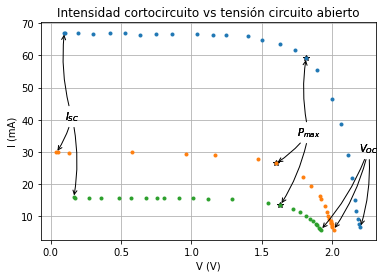

In [4]:
# Experimento 2
from kneed import KneeLocator

df_e2 = pd.read_csv(DATA_PATH + "experimento2_celula_solar.csv")

errorV = 0.001 # V
errorI = 0.1 # mA

plt.errorbar(df_e2["V/V(70)"], df_e2["I/mA(70)"], xerr=errorV, yerr=errorI, fmt=".", label="Distancia 70 cm")
plt.errorbar(df_e2["V/V(110)"], df_e2["I/mA(110)"], xerr=errorV, yerr=errorI, fmt=".", label="Distancia 110 cm")
plt.errorbar(df_e2["V/V(150)"], df_e2["I/mA(150)"], xerr=errorV, yerr=errorI, fmt=".", label="Distancia 150 cm")
plt.title("Intensidad cortocircuito vs tensión circuito abierto")
plt.ylabel("I (mA)")
plt.xlabel("V (V)")

 # V_oc
pos_Voc = (2.19, 30)

V_OC_70 = df_e2["V/V(70)"].iloc[0]
V_OC_110 = df_e2["V/V(110)"].iloc[0]
V_OC_150 = df_e2["V/V(150)"].iloc[0]

plt.annotate(
    r"$V_{OC}$",
    xy=(V_OC_70, df_e2["I/mA(70)"].iloc[0]), 
    xycoords="data",
    xytext=pos_Voc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1")
)

plt.annotate(
    r"$V_{OC}$",
    xy=(V_OC_110, df_e2["I/mA(110)"].iloc[0]), 
    xycoords="data",
    xytext=pos_Voc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1")
)

plt.annotate(
    r"$V_{OC}$",
    xy=(V_OC_150, df_e2["I/mA(150)"].iloc[0]), 
    xycoords="data",
    xytext=pos_Voc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1")
)

# I_sc
pos_Ioc = (0.1, 40)

I_SC_70 = df_e2["I/mA(70)"].dropna().iloc[-1]
I_SC_110 = df_e2["I/mA(110)"].dropna().iloc[-1]
I_SC_150 = df_e2["I/mA(150)"].dropna().iloc[-1]

plt.annotate(
    r"$I_{SC}$",
    xy=(df_e2["V/V(70)"].dropna().iloc[-1], I_SC_70), 
    xycoords="data",
    xytext=pos_Ioc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.annotate(
    r"$I_{SC}$",
    xy=(df_e2["V/V(110)"].dropna().iloc[-1], I_SC_110), 
    xycoords="data",
    xytext=pos_Ioc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.annotate(
    r"$I_{SC}$",
    xy=(df_e2["V/V(150)"].dropna().iloc[-1], I_SC_150), 
    xycoords="data",
    xytext=pos_Ioc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

# Potencia máxima
elbow_70 = KneeLocator(
    df_e2["V/V(70)"].dropna().to_numpy(),
    df_e2["I/mA(70)"].dropna().to_numpy(),
    curve="concave",
    direction="decreasing",
    online=False
)
# Malos resultados según knee
"""
elbow_110 = KneeLocator(
    df_e2["V/V(110)"].dropna().to_numpy(),
    df_e2["I/mA(110)"].dropna().to_numpy(),
    curve="concave",
    direction="decreasing",
    online=False
)

elbow_150 = KneeLocator(
    df_e2["V/V(150)"].dropna().to_numpy(),
    df_e2["I/mA(150)"].dropna().to_numpy(),
    curve="concave",
    direction="decreasing",
    online=False
)
"""

V_Pmax_70, I_Pmax_70 = elbow_70.knee, elbow_70.knee_y
V_Pmax_110, I_Pmax_110 = df_e2["V/V(110)"].dropna().iloc()[-8], df_e2["I/mA(110)"].dropna().iloc()[-8]
V_Pmax_150, I_Pmax_150 = df_e2["V/V(150)"].dropna().iloc()[-15], df_e2["I/mA(150)"].dropna().iloc()[-15]


plt.plot(V_Pmax_70, I_Pmax_70, "k*")
#plt.plot(elbow_110.knee, elbow_110.knee_y, "k*") # mal resultado
plt.plot(V_Pmax_110, I_Pmax_110, "k*")
#plt.plot(elbow_150.knee, elbow_150.knee_y, "k*") # mal resultado
plt.plot(V_Pmax_150, I_Pmax_150, "k*")

pos_Pmax = (1.75, 35)

plt.annotate(
    r"$P_{max}$",
    xy=(V_Pmax_70, I_Pmax_70), 
    xycoords="data",
    xytext=pos_Pmax, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.annotate(
    r"$P_{max}$",
    xy=(V_Pmax_110, I_Pmax_110), 
    xycoords="data",
    xytext=pos_Pmax, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.annotate(
    r"$P_{max}$",
    xy=(V_Pmax_150, I_Pmax_150), 
    xycoords="data",
    xytext=pos_Pmax, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.grid(True)
#plt.legend(loc="center")
plt.savefig(FIGURES_PATH + "experimento2.png")
plt.show()

In [5]:
df_e1[(df_e1["d (cm)"] == 70) & (df_e1["d (cm)"] == 110) & (df_e1["d (cm)"] == 145)]["J (Wm^-2) (intensidad)"]

Series([], Name: J (Wm^-2) (intensidad), dtype: float64)

In [6]:
# Experimento 2. Datos relevantes

d2_e2 = (df_e1[["d (cm)", "J (Wm^-2) (intensidad)"]]
         .where((df_e1["d (cm)"] == 70) | (df_e1["d (cm)"] == 110) | (df_e1["d (cm)"] == 145))
         .dropna()
         .set_index("d (cm)")
)
d2_e2["errorJ (Wm⁻2)"] = errorJ

d2_e2["V_OC (V)"] = (V_OC_70, V_OC_110, V_OC_150)
d2_e2["errorV_OC (V)"] = errorV

d2_e2["I_SC (A)"] = (I_SC_70 / 1000, I_SC_110 / 1000, I_SC_150 / 1000)
d2_e2["errorI_SC (A)"] = errorI / 1000

d2_e2["V_Pmax (V)"] = (V_Pmax_70, V_Pmax_110, V_Pmax_150)
d2_e2["I_Pmax (A)"] = (I_Pmax_70 / 1000, I_Pmax_110 / 1000, I_Pmax_150 / 1000)
d2_e2["Pmax (W)"] = d2_e2["V_Pmax (V)"] * d2_e2["I_Pmax (A)"]
d2_e2["errorPmax (W)"] = d2_e2["I_Pmax (A)"] * d2_e2["errorV_OC (V)"] + d2_e2["V_Pmax (V)"] * d2_e2["errorI_SC (A)"]


d2_e2["R (Oh)"] = d2_e2["V_Pmax (V)"] / d2_e2["I_Pmax (A)"]
d2_e2["errorR (Oh)"] = d2_e2["errorV_OC (V)"] / d2_e2["I_Pmax (A)"] + abs(- d2_e2["V_Pmax (V)"] * d2_e2["errorI_SC (A)"] / (d2_e2["I_Pmax (A)"]**2))

d2_e2["FF"] = d2_e2["Pmax (W)"] / (d2_e2["V_OC (V)"] * d2_e2["I_SC (A)"])
d2_e2["errorFF"] = d2_e2["errorPmax (W)"] / (d2_e2["V_OC (V)"]*d2_e2["I_SC (A)"]) + abs(- d2_e2["Pmax (W)"] * d2_e2["errorI_SC (A)"] / (d2_e2["I_SC (A)"]**2)) + abs(- d2_e2["Pmax (W)"] * d2_e2["errorV_OC (V)"] / (d2_e2["V_OC (V)"]**2))

area_celula = 50 / 10000 # m^2
d2_e2["PL"] = d2_e2["J (Wm^-2) (intensidad)"] * area_celula
d2_e2["errorPL"] = d2_e2["errorJ (Wm⁻2)"] * area_celula
d2_e2["eficiencia"] = d2_e2["Pmax (W)"] / d2_e2["PL"]
d2_e2["errorEficiencia"] = d2_e2["errorPmax (W)"] / d2_e2["PL"] + abs(- d2_e2["Pmax (W)"] * d2_e2["errorPL"] / (d2_e2["PL"]**2))

d2_e2

,J (Wm^-2) (intensidad),errorJ (Wm⁻2),V_OC (V),errorV_OC (V),I_SC (A),errorI_SC (A),V_Pmax (V),I_Pmax (A),Pmax (W),errorPmax (W),R (Oh),errorR (Oh),FF,errorFF,PL,errorPL,eficiencia,errorEficiencia
d (cm),,,,,,,,,,,,,,,,,,
70.0,439.841340,0.440723,2.20,0.001,0.0671,0.0001,1.815,0.05920,0.107448,0.000241,30.658784,0.068680,0.727869,0.004039,2.199207,0.002204,0.048858,0.000158
110.0,186.425738,0.440723,2.01,0.001,0.0298,0.0001,1.600,0.02640,0.042240,0.000186,60.606061,0.267447,0.705199,0.007879,0.932129,0.002204,0.045316,0.000307
145.0,110.180696,0.440723,1.92,0.001,0.0158,0.0001,1.632,0.01348,0.021999,0.000177,121.068249,0.972316,0.725190,0.014643,0.550903,0.002204,0.039933,0.000480


   d (cm) |   ISC (mA) |   UOC (V) |   d (m) |   J (Wm^-2)
----------+------------+-----------+---------+-------------
       70 |       66.3 |      2.18 |     0.7 |     439.841
       80 |       51.3 |      2.13 |     0.8 |     341.119
       90 |       41.8 |      2.1  |     0.9 |     273.248
      100 |       33.7 |      2.06 |     1   |     223.446
      110 |       28   |      2.03 |     1.1 |     186.426
      120 |       23.8 |      2    |     1.2 |     159.542
      130 |       20.5 |      1.97 |     1.3 |     136.624
      140 |       18   |      1.94 |     1.4 |     117.232
      150 |      nan   |    nan    |     1.5 |     nan
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.114e+04
Date:                Wed, 25 Aug 202

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


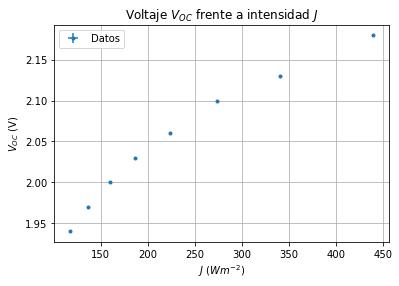

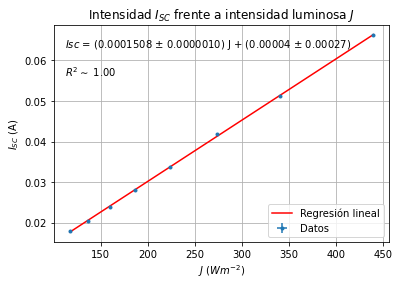

In [7]:
# Experimento 3

df_e3 = pd.read_csv(DATA_PATH + "experimento3_celula_solar.csv", header=None)
df_e3 = df_e3.transpose()
df_e3.columns = df_e3.iloc[0]
df_e3 = df_e3.drop(labels=0)
df_e3["d (m)"] = df_e3["d (cm)"] / 100
df_e3["J (Wm^-2)"] = df_e1[["J (Wm^-2) (intensidad)"]].where(df_e1["d (cm)"].isin(df_e3["d (cm)"])).dropna()

print(tabulate(
    df_e3, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e3["ISC (mA)"].dropna().to_numpy(dtype=float) / 1000
x = df_e3["J (Wm^-2)"].dropna().to_numpy(dtype=float)
X = sm.add_constant(x, prepend=True) # Our model needs an intercept so we add a column of 1s

ols2 = sm.OLS(y, X)
ols_result2 = ols2.fit()
print(ols_result2.summary())
print(" ")

y_pred = ols_result2.predict(X)
print("Coeficiente: %.3f" % ols_result2.params[1])
print("Término independiente: %.3f" % ols_result2.params[0])
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("R2: %.2f" % ols_result2.rsquared)
print(" ")

plt.errorbar(df_e3["J (Wm^-2)"], df_e3["UOC (V)"], xerr=errorJ, yerr=errorV, fmt=".", label="Datos")
plt.title("Voltaje $V_{OC}$ frente a intensidad $J$")
plt.ylabel("$V_{OC}$ (V)")
plt.xlabel("$J$ ($Wm^{-2}$)")
plt.grid(True)
plt.legend()
plt.savefig(FIGURES_PATH + "experimento3_voc.png")
plt.show()

plt.errorbar(x, y, xerr=errorJ, yerr=errorI/1000, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title("Intensidad $I_{SC}$ frente a intensidad luminosa $J$")
plt.xlabel("$J$ ($Wm^{-2}$)")
plt.ylabel("$I_{SC}$ (A)")
plt.figtext(.15, .8, f"$Isc$ = (%.7f $\pm$ %.7f) J + (%.5f $\pm$ %.5f)" % (ols_result2.params[1], ols_result2.bse[1], ols_result2.params[0], ols_result2.bse[0]))
plt.figtext(.15, .7, f"$R^2 \sim$ %.2f" % ols_result2.rsquared)
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig(FIGURES_PATH + "experimento3_reg.png")
plt.show()

V_OC/T:  -0.004848484848484839
Error V_OC/T:  0.0006483011937557381


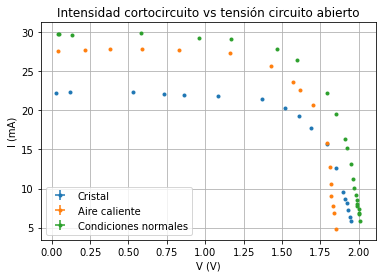

In [8]:
# Experimento 4

df_e4_glass = pd.read_csv(DATA_PATH + "experimento4_110glass_celula_solar.csv")
df_e4_hot = pd.read_csv(DATA_PATH + "experimento4_110hot_celula_solar.csv")

T_hot = 60 # ºC
T_amb = 27 # ºC
variacion_V_OC = df_e4_hot["V/V(110-hot)"].iloc[0] - df_e2["V/V(110)"].iloc[0]
variacion_T = T_hot - T_amb
errorT = 2 # ºC
errorFab = (2 * errorV / variacion_T) + abs(2 * variacion_V_OC * errorT / (variacion_T**2))
print("V_OC/T: ", variacion_V_OC / variacion_T)
print("Error V_OC/T: ", errorFab)

plt.errorbar(df_e4_glass["V/V(110-glass)"], df_e4_glass["I/mA(110-glass)"], xerr=errorV, yerr=errorI, fmt=".", label="Cristal")
plt.errorbar(df_e4_hot["V/V(110-hot)"], df_e4_hot["I/mA(110-hot)"], xerr=errorV, yerr=errorI, fmt=".", label="Aire caliente")
plt.errorbar(df_e2["V/V(110)"], df_e2["I/mA(110)"], xerr=errorV, yerr=errorI, fmt=".", label="Condiciones normales")
plt.title("Intensidad cortocircuito vs tensión circuito abierto")
plt.ylabel("I (mA)")
plt.xlabel("V (V)")

plt.grid(True)
plt.legend(loc="lower left")
plt.savefig(FIGURES_PATH + "experimento4.png")
plt.show()

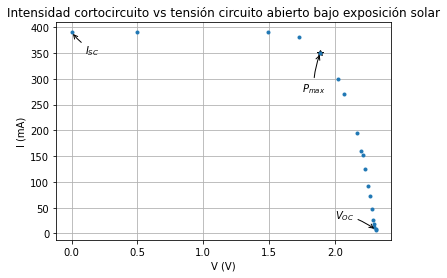

In [9]:
# Experimento 2
df_e5 = pd.read_csv(DATA_PATH + "experimento5_celula_solar.csv")

plt.errorbar(df_e5["V/V(Sun)"], df_e5["I/mA(Sun)"], xerr=errorV, yerr=errorI, fmt=".", label="Datos Sol")
plt.title("Intensidad cortocircuito vs tensión circuito abierto bajo exposición solar")
plt.ylabel("I (mA)")
plt.xlabel("V (V)")

 # V_oc
pos_Voc = (2, 30)
V_OC_sol = df_e5["V/V(Sun)"].iloc[0]
plt.annotate(
    r"$V_{OC}$",
    xy=(V_OC_sol, df_e5["I/mA(Sun)"].iloc[0]), 
    xycoords="data",
    xytext=pos_Voc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1")
)

# I_sc
pos_Ioc = (0.1, 350)
I_SC_sol = df_e5["I/mA(Sun)"].dropna().iloc[-1]
plt.annotate(
    r"$I_{SC}$",
    xy=(df_e5["V/V(Sun)"].dropna().iloc[-1], I_SC_sol), 
    xycoords="data",
    xytext=pos_Ioc, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

V_Pmax_sol, I_Pmax_sol = df_e5["V/V(Sun)"].dropna().iloc()[-5], df_e5["I/mA(Sun)"].dropna().iloc()[-5]
plt.plot(V_Pmax_sol, I_Pmax_sol, "k*")

pos_Pmax = (1.75, 275)
plt.annotate(
    r"$P_{max}$",
    xy=(V_Pmax_sol, I_Pmax_sol), 
    xycoords="data",
    xytext=pos_Pmax, fontsize=10,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1")
)

plt.grid(True)
#plt.legend(loc="center")
plt.savefig(FIGURES_PATH + "experimento5.png")
plt.show()

In [10]:
# Experimento 5. Datos relevantes Sol
df_e5["J (Wm^-2)"] = (25.8/1000) / sensibilidad_termopila

df_e5["errorJ (Wm⁻2)"] = errorJ

df_e5["V_OC (V)"] = V_OC_sol
df_e5["errorV_OC (V)"] = errorV

df_e5["I_SC (A)"] = I_SC_sol / 1000
df_e5["errorI_SC (A)"] = errorI / 1000

df_e5["V_Pmax (V)"] = V_Pmax_sol
df_e5["I_Pmax (A)"] = I_Pmax_sol / 1000
df_e5["Pmax (W)"] = df_e5["V_Pmax (V)"] * df_e5["I_Pmax (A)"]
df_e5["errorPmax (W)"] = df_e5["I_Pmax (A)"] * df_e5["errorV_OC (V)"] + df_e5["V_Pmax (V)"] * df_e5["errorI_SC (A)"]


df_e5["R (Oh)"] = df_e5["V_Pmax (V)"] / df_e5["I_Pmax (A)"]
df_e5["errorR (Oh)"] = df_e5["errorV_OC (V)"] / df_e5["I_Pmax (A)"] + abs(- df_e5["V_Pmax (V)"] * df_e5["errorI_SC (A)"] / (df_e5["I_Pmax (A)"]**2))

df_e5["FF"] = df_e5["Pmax (W)"] / (df_e5["V_OC (V)"] * df_e5["I_SC (A)"])
df_e5["errorFF"] = df_e5["errorPmax (W)"] / (df_e5["V_OC (V)"]*df_e5["I_SC (A)"]) + abs(- df_e5["Pmax (W)"] * df_e5["errorI_SC (A)"] / (df_e5["I_SC (A)"]**2)) + abs(- df_e5["Pmax (W)"] * df_e5["errorV_OC (V)"] / (df_e5["V_OC (V)"]**2))

area_celula = 50 / 10000 # m^2
df_e5["PL"] = df_e5["J (Wm^-2)"] * area_celula
df_e5["errorPL"] = df_e5["errorJ (Wm⁻2)"] * area_celula
df_e5["eficiencia"] = df_e5["Pmax (W)"] / df_e5["PL"]
df_e5["errorEficiencia"] = df_e5["errorPmax (W)"] / df_e5["PL"] + abs(- df_e5["Pmax (W)"] * df_e5["errorPL"] / (df_e5["PL"]**2))

df_e5

,V/V(Sun),I/mA(Sun),J (Wm^-2),errorJ (Wm⁻2),V_OC (V),errorV_OC (V),I_SC (A),errorI_SC (A),V_Pmax (V),I_Pmax (A),Pmax (W),errorPmax (W),R (Oh),errorR (Oh),FF,errorFF,PL,errorPL,eficiencia,errorEficiencia
0,2.31,7.0,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
1,2.31,8.8,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
2,2.30,12.2,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
3,2.30,18.6,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
4,2.29,27.0,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
5,2.28,47.4,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
6,2.27,72.3,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
7,2.25,92.6,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
8,2.23,125.6,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014
9,2.21,151.5,1137.064786,0.440723,2.31,0.001,0.39,0.0001,1.89,0.35,0.6615,0.000539,5.4,0.0044,0.734266,0.001157,5.685324,0.002204,0.116352,0.00014


In [11]:
# Experimento 5. Final

I_sc_5 = ols_result2.params[1] * df_e5["J (Wm^-2)"].iloc[0]
errorI_sc_5 = df_e5["J (Wm^-2)"].iloc[0] * ols_result2.bse[1] + ols_result2.params[1] * df_e5["errorJ (Wm⁻2)"].iloc[0]

print("I_sc mediante ajuste exp3: ", I_sc_5)
print("Error I_sc mediante ajuste exp3: ", errorI_sc_5)

I_sc mediante ajuste exp3:  0.1714610840892948
Error I_sc mediante ajuste exp3:  0.0012458334527952167
